In [1]:
#pandas, para lectura de datos.
import pandas as pd 

#numpy,  carga de datos en memoria
import numpy as np

#matplotlib, para graficar.
import matplotlib.pyplot as plt 

#Sequential es fundamental para apilar capas que pueden conformar una red neuronal o simplemente una función matématica.   
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

#sklern, pqra enmascarar las variables categòricas.
from sklearn.preprocessing import LabelEncoder



In [2]:
#Función para dibujar la frontera de decisión de la clasificación

def dibujar_frontera(X,Y,modelo,titulo):
    # Valor mínimo y máximo y rellenado con ceros
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Grilla de puntos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir categorías para cada punto en la gruilla
    Z = modelo.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    Y = np.argmax(Y,axis=1)
    idx0 = np.where(Y==0)
    idx1 = np.where(Y==1)
    idx2 = np.where(Y==2)
    plt.scatter(X[idx0,0],X[idx0,1],c=(1,0,0), edgecolor='k', label='Iris setosa')
    plt.scatter(X[idx1,0],X[idx1,1],c=(124./255.,44./255.,169./255.),edgecolor='k', label='Iris-versicolor')
    plt.scatter(X[idx2,0],X[idx2,1],c=(128./255.,128./255.,128./255.),edgecolor='k', label='Iris-virginica')
    plt.legend(fontsize=8,loc='upper right')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titulo)

    plt.xlabel('SepalLengthCm')
    plt.ylabel('SepalWidthCm')
    plt.show()



In [3]:
# dataset proveniente de los datos de iris, usaremos nada mas las columnas 1, 2 y 5.

datos = pd.read_csv('Iris.csv',usecols=[1,2,5])

In [4]:
#Split
# Crear datos de entrada (X) y de salida (Y)
X = datos.iloc[:,0:2].values
Y_str = datos.iloc[:,2].values

#Encoders, transformaciòn de variables categóricas a numéricas.

encoder = LabelEncoder()
encoder.fit(Y_str)
Y_num = encoder.transform(Y_str)

# Convertir "Y_num" a representación "one-hot", requerida por Keras durante
# el entrenamiento

n_clases = 3
Y = to_categorical(Y_num,n_clases)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


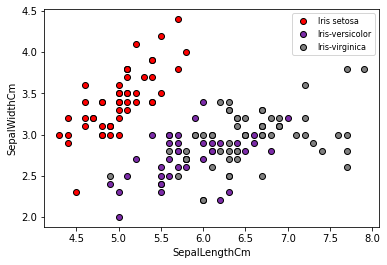

In [5]:
# Graficos de los datos
idx0 = np.where(Y_num==0)
idx1 = np.where(Y_num==1)
idx2 = np.where(Y_num==2)
plt.scatter(X[idx0,0],X[idx0,1],c=(1,0,0), edgecolor='k', label='Iris setosa')
plt.scatter(X[idx1,0],X[idx1,1],c=(124./255.,44./255.,169./255.),edgecolor='k', label='Iris-versicolor')
plt.scatter(X[idx2,0],X[idx2,1],c=(128./255.,128./255.,128./255.),edgecolor='k', label='Iris-virginica')
plt.legend(fontsize=8,loc='upper right')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [6]:
np.random.seed(1)          

input_dim = X.shape[1]
#X.shape= (150, 2) ; X.shape[1]=2

output_dim = Y.shape[1]
#Y.shape= (150, 3) ; X.shape[1]=3

modelo = Sequential()
modelo.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

# Optimizador (SGD, gradiente descendiente), tasa de aprendizaje (0.1),
# función de pérdida (categorical_crossentropy) y métrica de desempeño (accuracy).
sgd = SGD(lr=0.1)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#Entrenamiento 

n_iteraciones = 2000
batch_size = X.shape[0]
#X.shape= (150, 2) ; X.shape[0]=150

historia = modelo.fit(X,Y,epochs=n_iteraciones,batch_size=batch_size,verbose=2)


Epoch 1/2000
1/1 - 0s - loss: 1.0345 - accuracy: 0.3333
Epoch 2/2000
1/1 - 0s - loss: 0.9708 - accuracy: 0.6600
Epoch 3/2000
1/1 - 0s - loss: 0.9415 - accuracy: 0.5667
Epoch 4/2000
1/1 - 0s - loss: 0.9334 - accuracy: 0.6533
Epoch 5/2000
1/1 - 0s - loss: 0.9273 - accuracy: 0.7000
Epoch 6/2000
1/1 - 0s - loss: 0.9220 - accuracy: 0.6733
Epoch 7/2000
1/1 - 0s - loss: 0.9170 - accuracy: 0.6933
Epoch 8/2000
1/1 - 0s - loss: 0.9121 - accuracy: 0.6867
Epoch 9/2000
1/1 - 0s - loss: 0.9073 - accuracy: 0.6867
Epoch 10/2000
1/1 - 0s - loss: 0.9026 - accuracy: 0.6867
Epoch 11/2000
1/1 - 0s - loss: 0.8981 - accuracy: 0.6867
Epoch 12/2000
1/1 - 0s - loss: 0.8936 - accuracy: 0.6800
Epoch 13/2000
1/1 - 0s - loss: 0.8892 - accuracy: 0.6800
Epoch 14/2000
1/1 - 0s - loss: 0.8848 - accuracy: 0.6800
Epoch 15/2000
1/1 - 0s - loss: 0.8806 - accuracy: 0.6800
Epoch 16/2000
1/1 - 0s - loss: 0.8764 - accuracy: 0.6867
Epoch 17/2000
1/1 - 0s - loss: 0.8724 - accuracy: 0.6867
Epoch 18/2000
1/1 - 0s - loss: 0.8684 - 

Epoch 145/2000
1/1 - 0s - loss: 0.6483 - accuracy: 0.6933
Epoch 146/2000
1/1 - 0s - loss: 0.6475 - accuracy: 0.6933
Epoch 147/2000
1/1 - 0s - loss: 0.6468 - accuracy: 0.6933
Epoch 148/2000
1/1 - 0s - loss: 0.6460 - accuracy: 0.6933
Epoch 149/2000
1/1 - 0s - loss: 0.6453 - accuracy: 0.6933
Epoch 150/2000
1/1 - 0s - loss: 0.6446 - accuracy: 0.6933
Epoch 151/2000
1/1 - 0s - loss: 0.6439 - accuracy: 0.6933
Epoch 152/2000
1/1 - 0s - loss: 0.6431 - accuracy: 0.6933
Epoch 153/2000
1/1 - 0s - loss: 0.6424 - accuracy: 0.6933
Epoch 154/2000
1/1 - 0s - loss: 0.6417 - accuracy: 0.6933
Epoch 155/2000
1/1 - 0s - loss: 0.6410 - accuracy: 0.6867
Epoch 156/2000
1/1 - 0s - loss: 0.6404 - accuracy: 0.6867
Epoch 157/2000
1/1 - 0s - loss: 0.6397 - accuracy: 0.6867
Epoch 158/2000
1/1 - 0s - loss: 0.6390 - accuracy: 0.6867
Epoch 159/2000
1/1 - 0s - loss: 0.6383 - accuracy: 0.6867
Epoch 160/2000
1/1 - 0s - loss: 0.6377 - accuracy: 0.6867
Epoch 161/2000
1/1 - 0s - loss: 0.6370 - accuracy: 0.6867
Epoch 162/2000

Epoch 287/2000
1/1 - 0s - loss: 0.5813 - accuracy: 0.7200
Epoch 288/2000
1/1 - 0s - loss: 0.5810 - accuracy: 0.7200
Epoch 289/2000
1/1 - 0s - loss: 0.5807 - accuracy: 0.7200
Epoch 290/2000
1/1 - 0s - loss: 0.5804 - accuracy: 0.7200
Epoch 291/2000
1/1 - 0s - loss: 0.5801 - accuracy: 0.7200
Epoch 292/2000
1/1 - 0s - loss: 0.5798 - accuracy: 0.7200
Epoch 293/2000
1/1 - 0s - loss: 0.5795 - accuracy: 0.7200
Epoch 294/2000
1/1 - 0s - loss: 0.5792 - accuracy: 0.7200
Epoch 295/2000
1/1 - 0s - loss: 0.5789 - accuracy: 0.7200
Epoch 296/2000
1/1 - 0s - loss: 0.5786 - accuracy: 0.7200
Epoch 297/2000
1/1 - 0s - loss: 0.5784 - accuracy: 0.7200
Epoch 298/2000
1/1 - 0s - loss: 0.5781 - accuracy: 0.7200
Epoch 299/2000
1/1 - 0s - loss: 0.5778 - accuracy: 0.7200
Epoch 300/2000
1/1 - 0s - loss: 0.5775 - accuracy: 0.7200
Epoch 301/2000
1/1 - 0s - loss: 0.5772 - accuracy: 0.7200
Epoch 302/2000
1/1 - 0s - loss: 0.5769 - accuracy: 0.7200
Epoch 303/2000
1/1 - 0s - loss: 0.5766 - accuracy: 0.7200
Epoch 304/2000

Epoch 429/2000
1/1 - 0s - loss: 0.5489 - accuracy: 0.7333
Epoch 430/2000
1/1 - 0s - loss: 0.5488 - accuracy: 0.7333
Epoch 431/2000
1/1 - 0s - loss: 0.5486 - accuracy: 0.7400
Epoch 432/2000
1/1 - 0s - loss: 0.5484 - accuracy: 0.7400
Epoch 433/2000
1/1 - 0s - loss: 0.5482 - accuracy: 0.7400
Epoch 434/2000
1/1 - 0s - loss: 0.5481 - accuracy: 0.7400
Epoch 435/2000
1/1 - 0s - loss: 0.5479 - accuracy: 0.7400
Epoch 436/2000
1/1 - 0s - loss: 0.5477 - accuracy: 0.7400
Epoch 437/2000
1/1 - 0s - loss: 0.5476 - accuracy: 0.7400
Epoch 438/2000
1/1 - 0s - loss: 0.5474 - accuracy: 0.7400
Epoch 439/2000
1/1 - 0s - loss: 0.5472 - accuracy: 0.7400
Epoch 440/2000
1/1 - 0s - loss: 0.5471 - accuracy: 0.7400
Epoch 441/2000
1/1 - 0s - loss: 0.5469 - accuracy: 0.7400
Epoch 442/2000
1/1 - 0s - loss: 0.5467 - accuracy: 0.7400
Epoch 443/2000
1/1 - 0s - loss: 0.5465 - accuracy: 0.7400
Epoch 444/2000
1/1 - 0s - loss: 0.5464 - accuracy: 0.7400
Epoch 445/2000
1/1 - 0s - loss: 0.5462 - accuracy: 0.7400
Epoch 446/2000

Epoch 571/2000
1/1 - 0s - loss: 0.5286 - accuracy: 0.7667
Epoch 572/2000
1/1 - 0s - loss: 0.5285 - accuracy: 0.7667
Epoch 573/2000
1/1 - 0s - loss: 0.5283 - accuracy: 0.7667
Epoch 574/2000
1/1 - 0s - loss: 0.5282 - accuracy: 0.7667
Epoch 575/2000
1/1 - 0s - loss: 0.5281 - accuracy: 0.7667
Epoch 576/2000
1/1 - 0s - loss: 0.5280 - accuracy: 0.7667
Epoch 577/2000
1/1 - 0s - loss: 0.5279 - accuracy: 0.7667
Epoch 578/2000
1/1 - 0s - loss: 0.5278 - accuracy: 0.7667
Epoch 579/2000
1/1 - 0s - loss: 0.5276 - accuracy: 0.7667
Epoch 580/2000
1/1 - 0s - loss: 0.5275 - accuracy: 0.7667
Epoch 581/2000
1/1 - 0s - loss: 0.5274 - accuracy: 0.7667
Epoch 582/2000
1/1 - 0s - loss: 0.5273 - accuracy: 0.7667
Epoch 583/2000
1/1 - 0s - loss: 0.5272 - accuracy: 0.7667
Epoch 584/2000
1/1 - 0s - loss: 0.5271 - accuracy: 0.7667
Epoch 585/2000
1/1 - 0s - loss: 0.5269 - accuracy: 0.7667
Epoch 586/2000
1/1 - 0s - loss: 0.5268 - accuracy: 0.7667
Epoch 587/2000
1/1 - 0s - loss: 0.5267 - accuracy: 0.7667
Epoch 588/2000

Epoch 713/2000
1/1 - 0s - loss: 0.5140 - accuracy: 0.7733
Epoch 714/2000
1/1 - 0s - loss: 0.5139 - accuracy: 0.7733
Epoch 715/2000
1/1 - 0s - loss: 0.5138 - accuracy: 0.7733
Epoch 716/2000
1/1 - 0s - loss: 0.5137 - accuracy: 0.7733
Epoch 717/2000
1/1 - 0s - loss: 0.5137 - accuracy: 0.7733
Epoch 718/2000
1/1 - 0s - loss: 0.5136 - accuracy: 0.7733
Epoch 719/2000
1/1 - 0s - loss: 0.5135 - accuracy: 0.7733
Epoch 720/2000
1/1 - 0s - loss: 0.5134 - accuracy: 0.7733
Epoch 721/2000
1/1 - 0s - loss: 0.5133 - accuracy: 0.7733
Epoch 722/2000
1/1 - 0s - loss: 0.5132 - accuracy: 0.7733
Epoch 723/2000
1/1 - 0s - loss: 0.5131 - accuracy: 0.7733
Epoch 724/2000
1/1 - 0s - loss: 0.5130 - accuracy: 0.7733
Epoch 725/2000
1/1 - 0s - loss: 0.5130 - accuracy: 0.7733
Epoch 726/2000
1/1 - 0s - loss: 0.5129 - accuracy: 0.7733
Epoch 727/2000
1/1 - 0s - loss: 0.5128 - accuracy: 0.7733
Epoch 728/2000
1/1 - 0s - loss: 0.5127 - accuracy: 0.7733
Epoch 729/2000
1/1 - 0s - loss: 0.5126 - accuracy: 0.7733
Epoch 730/2000

Epoch 855/2000
1/1 - 0s - loss: 0.5028 - accuracy: 0.7800
Epoch 856/2000
1/1 - 0s - loss: 0.5027 - accuracy: 0.7800
Epoch 857/2000
1/1 - 0s - loss: 0.5026 - accuracy: 0.7800
Epoch 858/2000
1/1 - 0s - loss: 0.5026 - accuracy: 0.7800
Epoch 859/2000
1/1 - 0s - loss: 0.5025 - accuracy: 0.7800
Epoch 860/2000
1/1 - 0s - loss: 0.5024 - accuracy: 0.7800
Epoch 861/2000
1/1 - 0s - loss: 0.5024 - accuracy: 0.7800
Epoch 862/2000
1/1 - 0s - loss: 0.5023 - accuracy: 0.7800
Epoch 863/2000
1/1 - 0s - loss: 0.5022 - accuracy: 0.7800
Epoch 864/2000
1/1 - 0s - loss: 0.5021 - accuracy: 0.7800
Epoch 865/2000
1/1 - 0s - loss: 0.5021 - accuracy: 0.7800
Epoch 866/2000
1/1 - 0s - loss: 0.5020 - accuracy: 0.7800
Epoch 867/2000
1/1 - 0s - loss: 0.5019 - accuracy: 0.7800
Epoch 868/2000
1/1 - 0s - loss: 0.5019 - accuracy: 0.7800
Epoch 869/2000
1/1 - 0s - loss: 0.5018 - accuracy: 0.7800
Epoch 870/2000
1/1 - 0s - loss: 0.5017 - accuracy: 0.7800
Epoch 871/2000
1/1 - 0s - loss: 0.5017 - accuracy: 0.7800
Epoch 872/2000

Epoch 997/2000
1/1 - 0s - loss: 0.4937 - accuracy: 0.7800
Epoch 998/2000
1/1 - 0s - loss: 0.4936 - accuracy: 0.7800
Epoch 999/2000
1/1 - 0s - loss: 0.4936 - accuracy: 0.7800
Epoch 1000/2000
1/1 - 0s - loss: 0.4935 - accuracy: 0.7800
Epoch 1001/2000
1/1 - 0s - loss: 0.4935 - accuracy: 0.7800
Epoch 1002/2000
1/1 - 0s - loss: 0.4934 - accuracy: 0.7800
Epoch 1003/2000
1/1 - 0s - loss: 0.4933 - accuracy: 0.7800
Epoch 1004/2000
1/1 - 0s - loss: 0.4933 - accuracy: 0.7800
Epoch 1005/2000
1/1 - 0s - loss: 0.4932 - accuracy: 0.7800
Epoch 1006/2000
1/1 - 0s - loss: 0.4932 - accuracy: 0.7800
Epoch 1007/2000
1/1 - 0s - loss: 0.4931 - accuracy: 0.7800
Epoch 1008/2000
1/1 - 0s - loss: 0.4931 - accuracy: 0.7800
Epoch 1009/2000
1/1 - 0s - loss: 0.4930 - accuracy: 0.7800
Epoch 1010/2000
1/1 - 0s - loss: 0.4929 - accuracy: 0.7800
Epoch 1011/2000
1/1 - 0s - loss: 0.4929 - accuracy: 0.7800
Epoch 1012/2000
1/1 - 0s - loss: 0.4928 - accuracy: 0.7800
Epoch 1013/2000
1/1 - 0s - loss: 0.4928 - accuracy: 0.7800


Epoch 1136/2000
1/1 - 0s - loss: 0.4862 - accuracy: 0.7867
Epoch 1137/2000
1/1 - 0s - loss: 0.4862 - accuracy: 0.7867
Epoch 1138/2000
1/1 - 0s - loss: 0.4862 - accuracy: 0.7867
Epoch 1139/2000
1/1 - 0s - loss: 0.4861 - accuracy: 0.7867
Epoch 1140/2000
1/1 - 0s - loss: 0.4861 - accuracy: 0.7867
Epoch 1141/2000
1/1 - 0s - loss: 0.4860 - accuracy: 0.7867
Epoch 1142/2000
1/1 - 0s - loss: 0.4860 - accuracy: 0.7867
Epoch 1143/2000
1/1 - 0s - loss: 0.4859 - accuracy: 0.7867
Epoch 1144/2000
1/1 - 0s - loss: 0.4859 - accuracy: 0.7867
Epoch 1145/2000
1/1 - 0s - loss: 0.4858 - accuracy: 0.7867
Epoch 1146/2000
1/1 - 0s - loss: 0.4858 - accuracy: 0.7867
Epoch 1147/2000
1/1 - 0s - loss: 0.4857 - accuracy: 0.7867
Epoch 1148/2000
1/1 - 0s - loss: 0.4857 - accuracy: 0.7867
Epoch 1149/2000
1/1 - 0s - loss: 0.4856 - accuracy: 0.7867
Epoch 1150/2000
1/1 - 0s - loss: 0.4856 - accuracy: 0.7867
Epoch 1151/2000
1/1 - 0s - loss: 0.4855 - accuracy: 0.7867
Epoch 1152/2000
1/1 - 0s - loss: 0.4855 - accuracy: 0.78

Epoch 1275/2000
1/1 - 0s - loss: 0.4799 - accuracy: 0.7867
Epoch 1276/2000
1/1 - 0s - loss: 0.4798 - accuracy: 0.7867
Epoch 1277/2000
1/1 - 0s - loss: 0.4798 - accuracy: 0.7867
Epoch 1278/2000
1/1 - 0s - loss: 0.4797 - accuracy: 0.7867
Epoch 1279/2000
1/1 - 0s - loss: 0.4797 - accuracy: 0.7867
Epoch 1280/2000
1/1 - 0s - loss: 0.4797 - accuracy: 0.7867
Epoch 1281/2000
1/1 - 0s - loss: 0.4796 - accuracy: 0.7867
Epoch 1282/2000
1/1 - 0s - loss: 0.4796 - accuracy: 0.7867
Epoch 1283/2000
1/1 - 0s - loss: 0.4795 - accuracy: 0.7867
Epoch 1284/2000
1/1 - 0s - loss: 0.4795 - accuracy: 0.7867
Epoch 1285/2000
1/1 - 0s - loss: 0.4794 - accuracy: 0.7867
Epoch 1286/2000
1/1 - 0s - loss: 0.4794 - accuracy: 0.7867
Epoch 1287/2000
1/1 - 0s - loss: 0.4794 - accuracy: 0.7867
Epoch 1288/2000
1/1 - 0s - loss: 0.4793 - accuracy: 0.7867
Epoch 1289/2000
1/1 - 0s - loss: 0.4793 - accuracy: 0.7867
Epoch 1290/2000
1/1 - 0s - loss: 0.4792 - accuracy: 0.7867
Epoch 1291/2000
1/1 - 0s - loss: 0.4792 - accuracy: 0.78

Epoch 1414/2000
1/1 - 0s - loss: 0.4743 - accuracy: 0.7867
Epoch 1415/2000
1/1 - 0s - loss: 0.4743 - accuracy: 0.7867
Epoch 1416/2000
1/1 - 0s - loss: 0.4742 - accuracy: 0.7867
Epoch 1417/2000
1/1 - 0s - loss: 0.4742 - accuracy: 0.7867
Epoch 1418/2000
1/1 - 0s - loss: 0.4742 - accuracy: 0.7867
Epoch 1419/2000
1/1 - 0s - loss: 0.4741 - accuracy: 0.7867
Epoch 1420/2000
1/1 - 0s - loss: 0.4741 - accuracy: 0.7867
Epoch 1421/2000
1/1 - 0s - loss: 0.4741 - accuracy: 0.7867
Epoch 1422/2000
1/1 - 0s - loss: 0.4740 - accuracy: 0.7867
Epoch 1423/2000
1/1 - 0s - loss: 0.4740 - accuracy: 0.8000
Epoch 1424/2000
1/1 - 0s - loss: 0.4739 - accuracy: 0.8000
Epoch 1425/2000
1/1 - 0s - loss: 0.4739 - accuracy: 0.8000
Epoch 1426/2000
1/1 - 0s - loss: 0.4739 - accuracy: 0.8000
Epoch 1427/2000
1/1 - 0s - loss: 0.4738 - accuracy: 0.8000
Epoch 1428/2000
1/1 - 0s - loss: 0.4738 - accuracy: 0.8000
Epoch 1429/2000
1/1 - 0s - loss: 0.4738 - accuracy: 0.8000
Epoch 1430/2000
1/1 - 0s - loss: 0.4737 - accuracy: 0.80

Epoch 1553/2000
1/1 - 0s - loss: 0.4694 - accuracy: 0.8000
Epoch 1554/2000
1/1 - 0s - loss: 0.4694 - accuracy: 0.8000
Epoch 1555/2000
1/1 - 0s - loss: 0.4693 - accuracy: 0.8000
Epoch 1556/2000
1/1 - 0s - loss: 0.4693 - accuracy: 0.8000
Epoch 1557/2000
1/1 - 0s - loss: 0.4693 - accuracy: 0.8000
Epoch 1558/2000
1/1 - 0s - loss: 0.4692 - accuracy: 0.8000
Epoch 1559/2000
1/1 - 0s - loss: 0.4692 - accuracy: 0.8000
Epoch 1560/2000
1/1 - 0s - loss: 0.4692 - accuracy: 0.8000
Epoch 1561/2000
1/1 - 0s - loss: 0.4691 - accuracy: 0.8000
Epoch 1562/2000
1/1 - 0s - loss: 0.4691 - accuracy: 0.8000
Epoch 1563/2000
1/1 - 0s - loss: 0.4691 - accuracy: 0.8000
Epoch 1564/2000
1/1 - 0s - loss: 0.4690 - accuracy: 0.8000
Epoch 1565/2000
1/1 - 0s - loss: 0.4690 - accuracy: 0.8000
Epoch 1566/2000
1/1 - 0s - loss: 0.4690 - accuracy: 0.8000
Epoch 1567/2000
1/1 - 0s - loss: 0.4689 - accuracy: 0.8000
Epoch 1568/2000
1/1 - 0s - loss: 0.4689 - accuracy: 0.8000
Epoch 1569/2000
1/1 - 0s - loss: 0.4689 - accuracy: 0.80

Epoch 1692/2000
1/1 - 0s - loss: 0.4650 - accuracy: 0.8000
Epoch 1693/2000
1/1 - 0s - loss: 0.4650 - accuracy: 0.8000
Epoch 1694/2000
1/1 - 0s - loss: 0.4650 - accuracy: 0.8000
Epoch 1695/2000
1/1 - 0s - loss: 0.4650 - accuracy: 0.8000
Epoch 1696/2000
1/1 - 0s - loss: 0.4649 - accuracy: 0.8000
Epoch 1697/2000
1/1 - 0s - loss: 0.4649 - accuracy: 0.8000
Epoch 1698/2000
1/1 - 0s - loss: 0.4649 - accuracy: 0.8000
Epoch 1699/2000
1/1 - 0s - loss: 0.4648 - accuracy: 0.8000
Epoch 1700/2000
1/1 - 0s - loss: 0.4648 - accuracy: 0.8000
Epoch 1701/2000
1/1 - 0s - loss: 0.4648 - accuracy: 0.8000
Epoch 1702/2000
1/1 - 0s - loss: 0.4647 - accuracy: 0.8000
Epoch 1703/2000
1/1 - 0s - loss: 0.4647 - accuracy: 0.8000
Epoch 1704/2000
1/1 - 0s - loss: 0.4647 - accuracy: 0.8000
Epoch 1705/2000
1/1 - 0s - loss: 0.4647 - accuracy: 0.8000
Epoch 1706/2000
1/1 - 0s - loss: 0.4646 - accuracy: 0.8000
Epoch 1707/2000
1/1 - 0s - loss: 0.4646 - accuracy: 0.8000
Epoch 1708/2000
1/1 - 0s - loss: 0.4646 - accuracy: 0.80

Epoch 1831/2000
1/1 - 0s - loss: 0.4611 - accuracy: 0.8000
Epoch 1832/2000
1/1 - 0s - loss: 0.4611 - accuracy: 0.8000
Epoch 1833/2000
1/1 - 0s - loss: 0.4611 - accuracy: 0.8000
Epoch 1834/2000
1/1 - 0s - loss: 0.4610 - accuracy: 0.8000
Epoch 1835/2000
1/1 - 0s - loss: 0.4610 - accuracy: 0.8000
Epoch 1836/2000
1/1 - 0s - loss: 0.4610 - accuracy: 0.8000
Epoch 1837/2000
1/1 - 0s - loss: 0.4610 - accuracy: 0.8000
Epoch 1838/2000
1/1 - 0s - loss: 0.4609 - accuracy: 0.8000
Epoch 1839/2000
1/1 - 0s - loss: 0.4609 - accuracy: 0.8000
Epoch 1840/2000
1/1 - 0s - loss: 0.4609 - accuracy: 0.8000
Epoch 1841/2000
1/1 - 0s - loss: 0.4609 - accuracy: 0.8000
Epoch 1842/2000
1/1 - 0s - loss: 0.4608 - accuracy: 0.8000
Epoch 1843/2000
1/1 - 0s - loss: 0.4608 - accuracy: 0.8000
Epoch 1844/2000
1/1 - 0s - loss: 0.4608 - accuracy: 0.8000
Epoch 1845/2000
1/1 - 0s - loss: 0.4608 - accuracy: 0.8000
Epoch 1846/2000
1/1 - 0s - loss: 0.4607 - accuracy: 0.8000
Epoch 1847/2000
1/1 - 0s - loss: 0.4607 - accuracy: 0.80

Epoch 1970/2000
1/1 - 0s - loss: 0.4576 - accuracy: 0.8000
Epoch 1971/2000
1/1 - 0s - loss: 0.4576 - accuracy: 0.8000
Epoch 1972/2000
1/1 - 0s - loss: 0.4575 - accuracy: 0.8000
Epoch 1973/2000
1/1 - 0s - loss: 0.4575 - accuracy: 0.8000
Epoch 1974/2000
1/1 - 0s - loss: 0.4575 - accuracy: 0.8000
Epoch 1975/2000
1/1 - 0s - loss: 0.4575 - accuracy: 0.8000
Epoch 1976/2000
1/1 - 0s - loss: 0.4574 - accuracy: 0.8000
Epoch 1977/2000
1/1 - 0s - loss: 0.4574 - accuracy: 0.8000
Epoch 1978/2000
1/1 - 0s - loss: 0.4574 - accuracy: 0.8000
Epoch 1979/2000
1/1 - 0s - loss: 0.4574 - accuracy: 0.8000
Epoch 1980/2000
1/1 - 0s - loss: 0.4573 - accuracy: 0.8000
Epoch 1981/2000
1/1 - 0s - loss: 0.4573 - accuracy: 0.8000
Epoch 1982/2000
1/1 - 0s - loss: 0.4573 - accuracy: 0.8000
Epoch 1983/2000
1/1 - 0s - loss: 0.4573 - accuracy: 0.8000
Epoch 1984/2000
1/1 - 0s - loss: 0.4572 - accuracy: 0.8000
Epoch 1985/2000
1/1 - 0s - loss: 0.4572 - accuracy: 0.8000
Epoch 1986/2000
1/1 - 0s - loss: 0.4572 - accuracy: 0.80

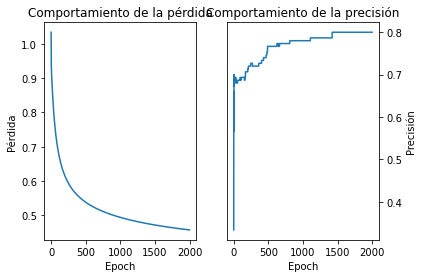

In [7]:
#
# Resultados
#

# Graficar comportamiento de la pérdida y de la precisión
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.title('Comportamiento de la pérdida')

plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.title('Comportamiento de la precisión')

ax = plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

plt.show()

#En el grafico de la izquierda:
#A medida que itera(epoch) el modelo, el error(perdida) disminuye.

#En el grafico de la derecha:
#A medida que itera(epoch) el modelo, la precisión(accuracy) aumenta.

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


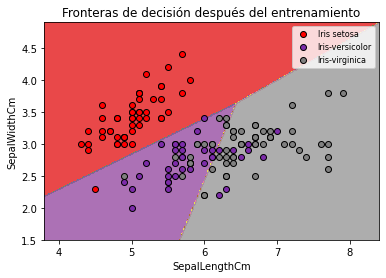

In [8]:
# Dibujar frontera de decisión
dibujar_frontera(X,Y,modelo,'Fronteras de decisión después del entrenamiento')